## Dragon Real Estate price predictor


In [1]:
import pandas as pd

In [2]:
housing= pd.read_csv("data1.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0
1,0.00632,18,2.31,0,0.538,NaN,65.2,4.09,1,296,15.3,396.9,4.98,24.0
2,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0
3,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0
4,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      590 non-null    float64
 1   ZN        590 non-null    int64  
 2    INDUS    590 non-null    float64
 3   CHAS      590 non-null    int64  
 4   NOX       590 non-null    float64
 5    RM       579 non-null    float64
 6   AGE       590 non-null    float64
 7   DIS       590 non-null    float64
 8   RAD       590 non-null    int64  
 9   TAX       590 non-null    int64  
 10   PTRATIO  590 non-null    float64
 11  B         590 non-null    float64
 12  LSTAT     590 non-null    float64
 13  MEDV      590 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 64.7 KB


In [5]:
housing['CHAS'].value_counts()

CHAS
0    590
Name: count, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,590.000000,590.000000,590.000000,590.0,590.000000,579.000000,590.000000,590.000000,590.000000,590.000000,590.000000,5.900000e+02,590.000000,590.000000
mean,0.037106,26.406780,13.011831,0.0,0.475790,6.298547,75.372203,3.690678,3.522034,274.142373,17.737966,3.969000e+02,9.696203,20.944305
std,0.013413,3.662867,4.662829,0.0,0.027105,0.117138,4.432069,0.173986,1.098860,9.523453,1.062231,5.689165e-14,2.054868,1.341840
min,0.006320,18.000000,2.310000,0.0,0.464000,6.249000,65.200000,3.615000,1.000000,270.000000,15.300000,3.969000e+02,4.980000,20.100000
25%,0.042940,28.000000,15.040000,0.0,0.464000,6.249000,77.300000,3.615000,4.000000,270.000000,18.200000,3.969000e+02,10.590000,20.247250
50%,0.042940,28.000000,15.040000,0.0,0.464000,6.249000,77.300000,3.615000,4.000000,270.000000,18.200000,3.969000e+02,10.590000,20.394500
75%,0.042940,28.000000,15.040000,0.0,0.464000,6.249000,77.300000,3.615000,4.000000,270.000000,18.200000,3.969000e+02,10.590000,20.541750
max,0.042940,28.000000,15.040000,0.0,0.538000,6.575000,77.300000,4.090000,4.000000,296.000000,18.200000,3.969000e+02,10.590000,24.000000


In [7]:
# %matplotlib inline

In [8]:
# for plotting histogram
# import matplotlib.pyplot as plt
# housing.hist(bins=50, figsize=(20, 15))


## Train Test Splitting



In [9]:
# for  learning purpose
import numpy as np
def split_train_test(data1, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data1))
    print(shuffled)
    test_set_size = int(len(data1) * test_ratio)
    test_indices = shuffled[ :test_set_size]
    train_indices = shuffled[test_set_size:]
    return data1.iloc[train_indices],data1.iloc[test_indices]   

In [10]:
# train_set, test_set = split_train_test(housing, 0.2)

In [11]:
# print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

Rows in train set: 472
Rows in test set: 118


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    

In [14]:
strat_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,118.000000,118.000000,118.000000,118.0,118.000000,114.000000,118.000000,118.000000,118.000000,118.000000,118.000000,1.180000e+02,118.000000,118.000000
mean,0.036733,26.305085,12.882373,0.0,0.476542,6.300474,75.249153,3.695508,3.491525,274.406780,17.708475,3.969000e+02,9.639153,20.978000
std,0.013798,3.767854,4.796479,0.0,0.027882,0.119398,4.559104,0.178973,1.130356,9.796421,1.092678,5.708582e-14,2.113766,1.380645
min,0.006320,18.000000,2.310000,0.0,0.464000,6.249000,65.200000,3.615000,1.000000,270.000000,15.300000,3.969000e+02,4.980000,20.100000
25%,0.042940,28.000000,15.040000,0.0,0.464000,6.249000,77.300000,3.615000,4.000000,270.000000,18.200000,3.969000e+02,10.590000,20.245000
50%,0.042940,28.000000,15.040000,0.0,0.464000,6.249000,77.300000,3.615000,4.000000,270.000000,18.200000,3.969000e+02,10.590000,20.397000
75%,0.042940,28.000000,15.040000,0.0,0.464000,6.249000,77.300000,3.615000,4.000000,270.000000,18.200000,3.969000e+02,10.590000,20.547750
max,0.042940,28.000000,15.040000,0.0,0.538000,6.575000,77.300000,4.090000,4.000000,296.000000,18.200000,3.969000e+02,10.590000,24.000000


In [15]:
strat_test_set['CHAS'].value_counts()

CHAS
0    118
Name: count, dtype: int64

In [16]:
strat_train_set['CHAS'].value_counts()

CHAS
0    472
Name: count, dtype: int64

In [17]:
# 97/7

In [18]:
# 376/28

In [19]:
# copy should be made to deal eith big data set 
housing = strat_train_set.copy()
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
257,0.04294,28,15.04,0,0.464,6.249,77.3,3.615,4,270,18.2,396.9,10.59,20.223
26,0.00632,18,2.31,0,0.538,6.575,65.2,4.090,1,296,15.3,396.9,4.98,24.000
37,0.00632,18,2.31,0,0.538,NaN,65.2,4.090,1,296,15.3,396.9,4.98,24.000
332,0.04294,28,15.04,0,0.464,6.249,77.3,3.615,4,270,18.2,396.9,10.59,20.298
364,0.04294,28,15.04,0,0.464,6.249,77.3,3.615,4,270,18.2,396.9,10.59,20.330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,0.04294,28,15.04,0,0.464,6.249,77.3,3.615,4,270,18.2,396.9,10.59,20.257
116,0.04294,28,15.04,0,0.464,6.249,77.3,3.615,4,270,18.2,396.9,10.59,20.820
72,0.00632,18,2.31,0,0.538,6.575,65.2,4.090,1,296,15.3,396.9,4.98,24.000
524,0.04294,28,15.04,0,0.464,6.249,77.3,3.615,4,270,18.2,396.9,10.59,20.490


## looking for correlation



In [20]:
corr_matrix = housing.corr()
corr_matrix['MEDV'] .sort_values(ascending=False)

MEDV        1.000000
DIS         0.991983
TAX         0.991983
NOX         0.991983
 RM         0.991667
AGE        -0.991983
RAD        -0.991983
ZN         -0.991983
LSTAT      -0.991983
CRIM       -0.991983
 INDUS     -0.991983
 PTRATIO   -0.991983
CHAS             NaN
B                NaN
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>]], dtype=object)

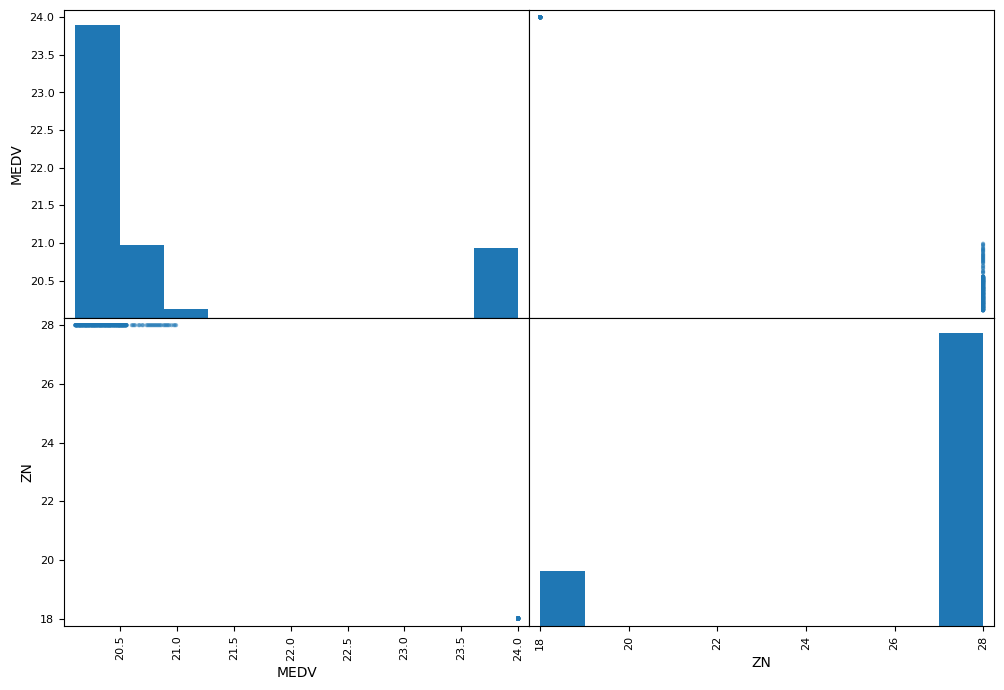

In [21]:
from pandas.plotting import scatter_matrix
attribute = ["MEDV","ZN"]
scatter_matrix(housing[attribute], figsize =(12,8))


<Axes: xlabel='ZN', ylabel='MEDV'>

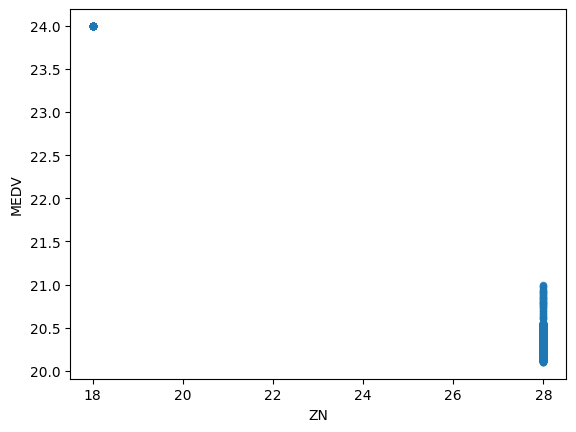

In [22]:
housing.plot(kind="scatter",x="ZN", y="MEDV", alpha=0.8)

## Trying out attribute combinations

In [23]:
housing["TAXRM"] = housing['ZN']/housing['NOX']
housing["TAXRM"]

257    60.344828
26     33.457249
37     33.457249
332    60.344828
364    60.344828
         ...    
291    60.344828
116    60.344828
72     33.457249
524    60.344828
534    60.344828
Name: TAXRM, Length: 472, dtype: float64

In [24]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
257,0.04294,28,15.04,0,0.464,6.249,77.3,3.615,4,270,18.2,396.9,10.59,20.223,60.344828
26,0.00632,18,2.31,0,0.538,6.575,65.2,4.090,1,296,15.3,396.9,4.98,24.000,33.457249
37,0.00632,18,2.31,0,0.538,NaN,65.2,4.090,1,296,15.3,396.9,4.98,24.000,33.457249
332,0.04294,28,15.04,0,0.464,6.249,77.3,3.615,4,270,18.2,396.9,10.59,20.298,60.344828
364,0.04294,28,15.04,0,0.464,6.249,77.3,3.615,4,270,18.2,396.9,10.59,20.330,60.344828


In [25]:
corr_matrix = housing.corr()
corr_matrix['MEDV'] .sort_values(ascending=False)

MEDV        1.000000
DIS         0.991983
TAX         0.991983
NOX         0.991983
 RM         0.991667
AGE        -0.991983
RAD        -0.991983
ZN         -0.991983
LSTAT      -0.991983
TAXRM      -0.991983
CRIM       -0.991983
 INDUS     -0.991983
 PTRATIO   -0.991983
CHAS             NaN
B                NaN
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

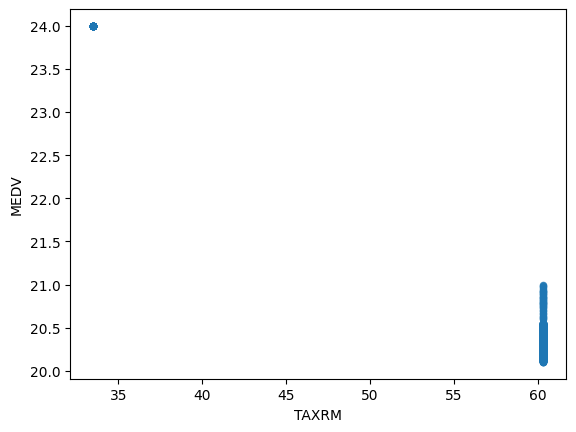

In [26]:
housing.plot(kind="scatter",x="TAXRM", y="MEDV", alpha=0.8)

## Attribute combinations

In [27]:
housing["TAXRM"] = housing['CHAS'] / housing['MEDV']
housing["TAXRM"]


257    0.0
26     0.0
37     0.0
332    0.0
364    0.0
      ... 
291    0.0
116    0.0
72     0.0
524    0.0
534    0.0
Name: TAXRM, Length: 472, dtype: float64

In [28]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
257,0.04294,28,15.04,0,0.464,6.249,77.3,3.615,4,270,18.2,396.9,10.59,20.223,0.0
26,0.00632,18,2.31,0,0.538,6.575,65.2,4.090,1,296,15.3,396.9,4.98,24.000,0.0
37,0.00632,18,2.31,0,0.538,NaN,65.2,4.090,1,296,15.3,396.9,4.98,24.000,0.0
332,0.04294,28,15.04,0,0.464,6.249,77.3,3.615,4,270,18.2,396.9,10.59,20.298,0.0
364,0.04294,28,15.04,0,0.464,6.249,77.3,3.615,4,270,18.2,396.9,10.59,20.330,0.0


In [29]:
corr_matrix = housing.corr()
corr_matrix['MEDV'] .sort_values(ascending=False)

MEDV        1.000000
DIS         0.991983
TAX         0.991983
NOX         0.991983
 RM         0.991667
AGE        -0.991983
RAD        -0.991983
ZN         -0.991983
LSTAT      -0.991983
CRIM       -0.991983
 INDUS     -0.991983
 PTRATIO   -0.991983
CHAS             NaN
B                NaN
TAXRM            NaN
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

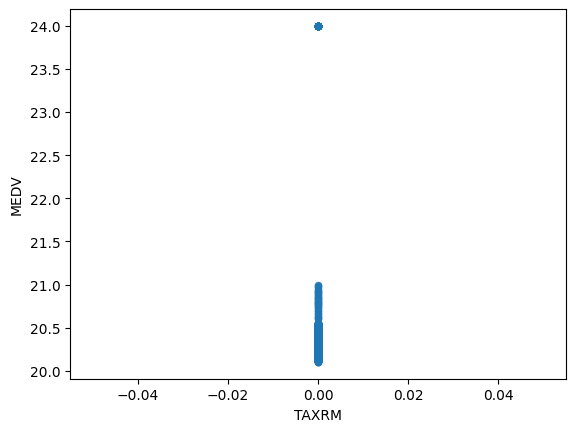

In [30]:
housing.plot(kind="scatter", x="TAXRM",y="MEDV", alpha=0.8)

In [31]:
housing= strat_train_set.drop("MEDV",axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## MISSING ATTRIBUTES

In [32]:
# TO TAKE CARE OF MISSING ATTRIBUTE, YOU HAVE THREE OPTION:
#  1. GET RID OF THE MISSING DATA POINT
#  2.GET RID OF THE WHOLE ATTRIBUTE
#  3. SET THE VALUE TO SOME VALUE(0,MEAN R MEDIAN)

In [33]:
print(housing.columns)



Index(['CRIM ', 'ZN', ' INDUS', 'CHAS', 'NOX', ' RM', 'AGE', 'DIS', 'RAD',
       'TAX ', ' PTRATIO', 'B', 'LSTAT '],
      dtype='object')


In [34]:
a = housing.dropna(subset=["NOX"])
a.shape


(472, 13)

In [35]:
median = housing ["CHAS"].median()
median

0.0

In [36]:
housing["NOX"].fillna(median)

257    0.464
26     0.538
37     0.538
332    0.464
364    0.464
       ...  
291    0.464
116    0.464
72     0.538
524    0.464
534    0.464
Name: NOX, Length: 472, dtype: float64

In [37]:
housing.shape

(472, 13)

In [38]:
# before we started filling missing attributes
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,472.000000,472.000000,472.000000,472.0,472.000000,465.000000,472.000000,472.00000,472.000000,472.000000,472.000000,472.0,472.000000
mean,0.037199,26.432203,13.044195,0.0,0.475602,6.298075,75.402966,3.68947,3.529661,274.076271,17.745339,396.9,9.710466
std,0.013329,3.639787,4.633449,0.0,0.026934,0.116702,4.404142,0.17289,1.091936,9.463446,1.055538,0.0,2.041920
min,0.006320,18.000000,2.310000,0.0,0.464000,6.249000,65.200000,3.61500,1.000000,270.000000,15.300000,396.9,4.980000
25%,0.042940,28.000000,15.040000,0.0,0.464000,6.249000,77.300000,3.61500,4.000000,270.000000,18.200000,396.9,10.590000
50%,0.042940,28.000000,15.040000,0.0,0.464000,6.249000,77.300000,3.61500,4.000000,270.000000,18.200000,396.9,10.590000
75%,0.042940,28.000000,15.040000,0.0,0.464000,6.249000,77.300000,3.61500,4.000000,270.000000,18.200000,396.9,10.590000
max,0.042940,28.000000,15.040000,0.0,0.538000,6.575000,77.300000,4.09000,4.000000,296.000000,18.200000,396.9,10.590000


In [39]:

from sklearn.impute import SimpleImputer


# Assuming 'housing' is your DataFrame with missing values

# Creating the SimpleImputer object with the desired strategy
imputer = SimpleImputer(strategy="median")

# Fit the imputer to your data (in this case, the 'housing' DataFrame)
imputer.fit(housing)


SimpleImputer(strategy='median')

In [40]:
imputer.statistics_

array([4.294e-02, 2.800e+01, 1.504e+01, 0.000e+00, 4.640e-01, 6.249e+00,
       7.730e+01, 3.615e+00, 4.000e+00, 2.700e+02, 1.820e+01, 3.969e+02,
       1.059e+01])

In [41]:
X = imputer.transform(housing)

In [42]:
housing_tr = pd.DataFrame(X, columns=housing.columns)
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
257,0.04294,28,15.04,0,0.464,6.249,77.3,3.615,4,270,18.2,396.9,10.59
26,0.00632,18,2.31,0,0.538,6.575,65.2,4.090,1,296,15.3,396.9,4.98
37,0.00632,18,2.31,0,0.538,NaN,65.2,4.090,1,296,15.3,396.9,4.98
332,0.04294,28,15.04,0,0.464,6.249,77.3,3.615,4,270,18.2,396.9,10.59
364,0.04294,28,15.04,0,0.464,6.249,77.3,3.615,4,270,18.2,396.9,10.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,0.04294,28,15.04,0,0.464,6.249,77.3,3.615,4,270,18.2,396.9,10.59
116,0.04294,28,15.04,0,0.464,6.249,77.3,3.615,4,270,18.2,396.9,10.59
72,0.00632,18,2.31,0,0.538,6.575,65.2,4.090,1,296,15.3,396.9,4.98
524,0.04294,28,15.04,0,0.464,6.249,77.3,3.615,4,270,18.2,396.9,10.59


In [43]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,472.000000,472.000000,472.000000,472.0,472.000000,472.000000,472.000000,472.00000,472.000000,472.000000,472.000000,472.0,472.000000
mean,0.037199,26.432203,13.044195,0.0,0.475602,6.297347,75.402966,3.68947,3.529661,274.076271,17.745339,396.9,9.710466
std,0.013329,3.639787,4.633449,0.0,0.026934,0.115984,4.404142,0.17289,1.091936,9.463446,1.055538,0.0,2.041920
min,0.006320,18.000000,2.310000,0.0,0.464000,6.249000,65.200000,3.61500,1.000000,270.000000,15.300000,396.9,4.980000
25%,0.042940,28.000000,15.040000,0.0,0.464000,6.249000,77.300000,3.61500,4.000000,270.000000,18.200000,396.9,10.590000
50%,0.042940,28.000000,15.040000,0.0,0.464000,6.249000,77.300000,3.61500,4.000000,270.000000,18.200000,396.9,10.590000
75%,0.042940,28.000000,15.040000,0.0,0.464000,6.249000,77.300000,3.61500,4.000000,270.000000,18.200000,396.9,10.590000
max,0.042940,28.000000,15.040000,0.0,0.538000,6.575000,77.300000,4.09000,4.000000,296.000000,18.200000,396.9,10.590000


#scikit-learn design

primarily, three types of objects

1.Estimators - it estimates some parameter based on a dataset. eg. imputer
    it has a fit method and transform method.
    fit method- fits the dataset and calulates parmeters
        
2.Transformers- transform method takes input and returns output based on the
    learning from fit().it also has a convenience  function called fit_transform()
    which fitS and then transforms

3.predictors-Linear Regression model is an example of predictor. 
    fit() and predict() are two common function. 
    it also gives score() function which will evaluate the prediction 

## Feature Scaling


primarly, two type of feature scaling methods:
1.min-max scaling (normalization)
   (value-min)/(min-max)
   sklearn provides a class called min max scaler for this 

2.Standerdization
    (value-mean)/std
    sklearn provides a class called standard scaler for this
   

## Creating a pipeline

In [44]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
#    .....add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])

In [45]:
housing_num_tr = my_pipeline.fit_transform(housing)
housing_num_tr

array([[ 0.4311956 ,  0.4311956 ,  0.4311956 , ...,  0.4311956 ,
         0.        ,  0.4311956 ],
       [-2.31913311, -2.31913311, -2.31913311, ..., -2.31913311,
         0.        , -2.31913311],
       [-2.31913311, -2.31913311, -2.31913311, ..., -2.31913311,
         0.        , -2.31913311],
       ...,
       [-2.31913311, -2.31913311, -2.31913311, ..., -2.31913311,
         0.        , -2.31913311],
       [ 0.4311956 ,  0.4311956 ,  0.4311956 , ...,  0.4311956 ,
         0.        ,  0.4311956 ],
       [ 0.4311956 ,  0.4311956 ,  0.4311956 , ...,  0.4311956 ,
         0.        ,  0.4311956 ]])

In [46]:
housing_num_tr.shape

(472, 13)

## Selectin a desiered model for Dragon Real Estates

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model= linear regresion
#model= Decision tree regresion
#model= Random Forest Regressor
model = LinearRegression()
model.fit(housing_num_tr, housing_labels)


LinearRegression()

In [48]:
some_data = housing.iloc[:5]

In [49]:
some_labels = housing_labels.iloc[:5]

In [50]:
prepared_data = my_pipeline.transform(some_data)

In [51]:
model.predict(prepared_data)

array([20.3689374 , 23.98311892, 23.9836072 , 20.3689374 , 20.36880118])

In [52]:
list(some_labels)

[20.223, 24.0, 24.0, 20.298, 20.33]

## Evaluating the model

In [53]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [54]:
rmse

0.16846652237908663

## using better evaluation techinque - cross validation

In [55]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)    
rmse_scores

array([0.12659021, 0.15378933, 0.17895151, 0.20253358, 0.16340659,
       0.16868493, 0.18733478, 0.16334051, 0.18205186, 0.14768561])

In [56]:
def print_scores(scores):
    print("scores:",scores)
    print("mean: ", scores.mean())
    print("standard deviation: ", scores.std())

In [57]:
print_scores(rmse_scores)

scores: [0.12659021 0.15378933 0.17895151 0.20253358 0.16340659 0.16868493
 0.18733478 0.16334051 0.18205186 0.14768561]
mean:  0.16743688922517608
standard deviation:  0.020623503828958674


## saving the model

In [58]:
from joblib import dump, load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

## Testing the model on test data

In [66]:
x_test = strat_test_set.drop("MEDV",axis=1)
Y_test = strat_test_set["MEDV"].copy()
x_test_prepared= my_pipeline.transform(x_test)
final_predictions = model.predict(x_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))


[23.98311892 23.98311892 20.3689374  20.3689374  20.3689374  20.3689374
 20.3689374  20.3689374  20.3689374  20.3689374  20.3689374  20.3689374
 20.3689374  20.3689374  20.3689374  20.3689374  20.3689374  23.98311892
 23.98311892 20.3689374  20.3689374  20.3689374  20.3689374  20.3689374
 20.3689374  20.3689374  20.3689374  20.3689374  20.3689374  20.3689374
 20.3689374  23.98311892 20.3689374  23.98311892 20.3689374  20.3689374
 20.3689374  20.3689374  20.3689374  23.98311892 20.3689374  20.3689374
 20.3689374  20.3689374  20.3689374  20.3689374  20.3689374  20.3689374
 20.3689374  20.3689374  20.3689374  20.3689374  20.3689374  20.3689374
 20.3689374  20.3689374  23.98311892 20.3689374  20.3689374  20.3689374
 20.3689374  20.3689374  20.3689374  20.3689374  20.3689374  20.3689374
 20.3689374  20.3689374  23.98311892 20.3689374  20.3689374  23.98311892
 20.3689374  20.3689374  20.3689374  20.3689374  20.3689374  20.3689374
 20.3689374  20.3689374  20.3689374  20.3689374  20.3689374  2

In [63]:
final_rmse

0.16233251284294892

## using the model

In [72]:
from joblib import dump, load
import numpy as np
model= load( 'Dragon.joblib')
feature= np.array([[4.294e-02, 2.800e+01, 1.504e+01, 0.000e+00, 4.640e-01, 6.249e+00,
       7.730e+01, 3.615e+00, 4.000e+00, 2.700e+02, 1.820e+01, 3.969e+02,
       1.059e+01]])
model.predict(feature)



array([1.79316454e+14])